# **Automatic Differentiation** with **Autograd**

By Peter Minwegen


In [1]:
! pip install autograd

  Created wheel for autograd: filename=autograd-1.3-py3-none-any.whl size=47990 sha256=adcabc40eeda8b0bc6ad5aaf48360481da024b4c25127e28fb8a3bd7340142f4
  Stored in directory: /home/jovyan/.cache/pip/wheels/ef/32/31/0e87227cd0ca1d99ad51fbe4b54c6fa02afccf7e483d045e04
Successfully built autograd


# About Autograd:

-Autograd is designed to efficiently compute derivatives of native Python and NumPy code. 

-It can handle a large subset of Python features, functions, and it is even built to handle the derivatives of derivatives.

-The primary purpose of Autograd is its gradient based optimization.



# Example of function:

In [29]:
import autograd.numpy as np
from autograd import grad


def tanh(x):
    y = np.exp(-2.0 * x)
    return (1.0 - y) / (1.0 + y)

grad_tanh = grad(tanh)

print("Estimated Gradient:", grad_tanh(1.0))

print("Calculated Gradient:",(tanh(1.0001) - tanh(0.9999)) / 0.0002)

print("Difference in Gradient = ", grad_tanh(1.0) - (tanh(1.0001) - tanh(0.9999)) / 0.0002)



Estimated Gradient: 0.419974341614026
Calculated Gradient: 0.41997434264973155
Difference in Gradient =  -1.0357055213461308e-09


# Example of Derivative of Derivatives:

Cubed:


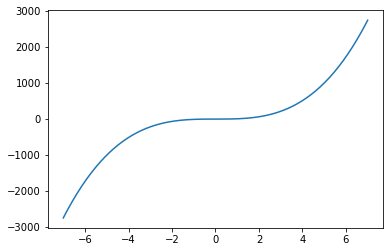

Derivative of Cubed:


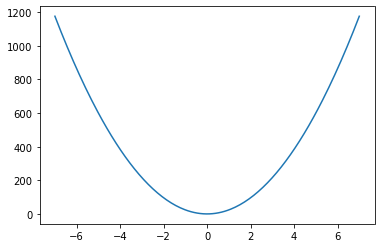

Derivative of (Derivative of Cubed):


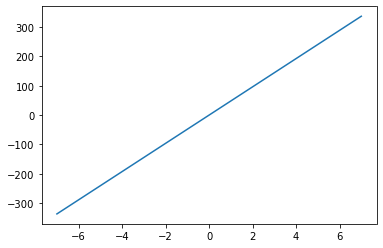

Derivative of (Derivative of (Derivative of Cubed)):


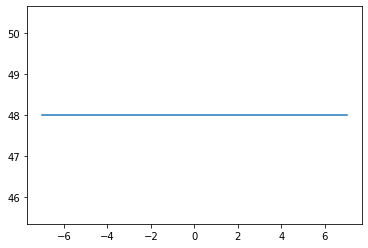

Deeply Nested Derivative Example:


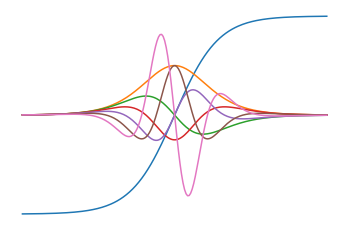

In [43]:
from __future__ import absolute_import
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import elementwise_grad as egrad


def tanh(x):
    return (1.0 - np.exp(-x))  / (1.0 + np.exp(-x))

#simple cubic function
def cubed(x):
    return((2*x)**3)


print("Cubed:")
plt.plot(x, cubed(x))
plt.axis('on')
plt.show()

print("Derivative of Cubed:")
plt.plot(x, egrad(cubed)(x))
plt.axis('on')
plt.show()

print("Derivative of (Derivative of Cubed):")
plt.plot(x, egrad(egrad(cubed))(x))
plt.axis('on')
plt.show()

print("Derivative of (Derivative of (Derivative of Cubed)):")
plt.plot(x, egrad(egrad(egrad(cubed)))(x))
plt.axis('on')
plt.show()

#example of deeply nested derivatives
print("Deeply Nested Derivative Example:")
x = np.linspace(-7, 7, 200)
plt.plot(x, tanh(x),
         x, egrad(tanh)(x),                                    # first derivative
         x, egrad(egrad(tanh))(x),                              # second derivative
         x, egrad(egrad(egrad(tanh)))(x),                       # third derivative
         x, egrad(egrad(egrad(egrad(tanh))))(x),                # fourth derivative
         x, egrad(egrad(egrad(egrad(egrad(tanh)))))(x),         # fifth derivative
         x, egrad(egrad(egrad(egrad(egrad(egrad(tanh))))))(x))  # sixth derivative

plt.axis('off')

plt.show()

# About the method:
The method relates to activity 2020-04-07 NUMERCIAL DIFFERENTIATION

As we observed the differentiation methods, $$ f'(x) \approx \frac{f(x+h) - f(x)}{h} $$

and 

The "centered" formula,
$$ f'(x) \approx \frac{f(x+h) - f(x-h)}{2h} .$$

for some small $h > 0$.

Autograd can quickly determine derivatives of entire functions rather than at specific points.
Autograd is preferred over some built in NumPy and ADOL-C (https://github.com/b45ch1/pyadolc) because of its ability to take nested derivatives. Autograd also seems to have less requirements than ADOL-C.

# About the software:

Link: https://github.com/hips/autograd

Main Developers: Dougal Maclaurin, David Duvenaud, Matt Johnson, and Jamie Townsend

Main Users: Any in need of automatic or nested differentiation

Written in: Python 

Can be called from: Bash, Powershell, Python (With helpers: C, C++, HTML, Javascript)



# Method as it appears in the software

The method is one of the main use cases of the software.

How to call it: 
- Create the mathematical function to shape function(function input)
- call by: egrad (function) (function input) 



# Open Questions:

Performance cost?